In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Removing ouliers using the quantile API. This is a useful case where the user has a specific minimum threshold 0.01 and maximum threshold 0.99 for removing ouliers.

In [2]:
df = pd.read_csv("AB_NYC_2019.csv")
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


Let's plot our data before removing oultliers

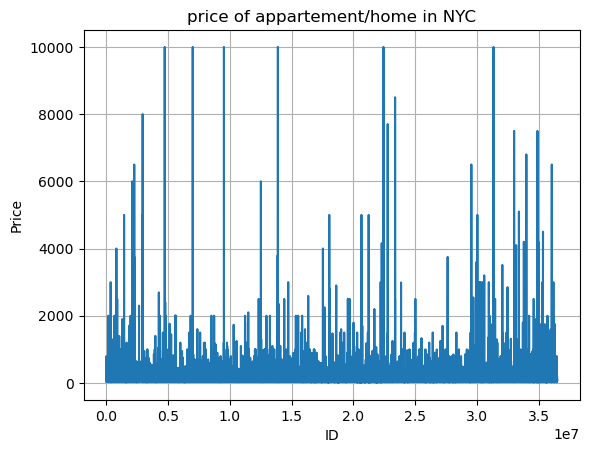

In [13]:
# Extract ID and Price columns
id_column = df['id']
price_column = df['price']

# Create a basic line plot
plt.plot(id_column, price_column)
plt.title('price of appartement/home in NYC')
plt.xlabel('ID')
plt.ylabel('Price')
plt.grid(True)

# Display the plot
plt.show()

In [3]:
# The API describe help you to get the basic information of the data
df.price.describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [6]:
# define the min and max thresholds
percentile_001 = df.price.quantile(0.01)
percentile_099 = df.price.quantile(0.99)
percentile_099 , percentile_001

(799.0, 30.0)

In [8]:
#create a new dataframe with outliers removed
df_no_outlier = df[(df.price>=percentile_001) & (df.price<=percentile_099)]

In [9]:
df_no_outlier.price.describe()

count    48017.000000
mean       138.502010
std        103.694011
min         30.000000
25%         70.000000
50%        105.000000
75%        175.000000
max        799.000000
Name: price, dtype: float64

Now after removing outliers, we can see that the distribution of the data is more normal.

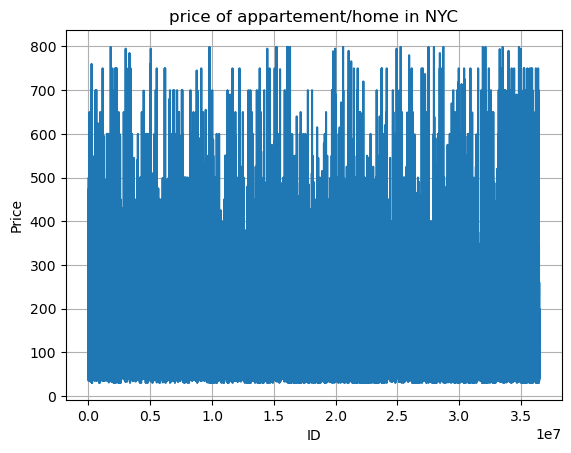

In [14]:
id_column = df_no_outlier['id']
price_column = df_no_outlier['price']

# Create a basic line plot
plt.plot(id_column, price_column)
plt.title('price of appartement/home in NYC')
plt.xlabel('ID')
plt.ylabel('Price')
plt.grid(True)

# Display the plot
plt.show()